<div style="display: flex; justify-content: space-between; align-items: center; margin-bottom: 20px;">
    <img src="earthscope.png" alt="EarthScope Consortium Logo" style="width: 358px;height: 141px; margin-top: 10px;">
    <div style="flex: 0 0 auto; margin-left: auto; margin-bottom: 0;">
        <img src="https://www.sci.utah.edu/images/news/2023/sci-30-multi.jpg" alt="Scientific Computing and Imaging Institute Logo" width="150"/>
    </div>
</div>

<div style="text-align: center;">
    <h1>NSF National Data Platform (NDP)</h1>
    <h2>Streaming Data from EarthScope Consortium</h2>
</div>

The EarthScope Consortium ([www.earthscope.org](https://www.earthscope.org)) streams three-dimensional Global Navigation Satellite System (GNSS) high rate (1hz) position time series from nearly a thousand EarthScope and related GNSS stations. These high precision ground-motion time series are used to study a range of geophysical phenomena including earthquakes, volcanos, tsunamis, hydrologic loads, and glaciers. EarthScope is dedicated to supporting transformative global geophysical research and education through operation of the National Science Foundation’s (NSF) Geodetic GAGE and Seismic SAGE facilities. As part of the National Data Platform (NDP) EarthScope pilot project, the EarthScope GNSS position time series streams are being stored and made available from Data Collaboratory Kafka servers at the University of Utah. This Jupyter Notebook provides tools for access and plotting of sample real time streams and is the foundation for additional services being developed that will facilitate time series analysis including machine learning. 

#### Users of EarthScope data agree to follow the [EarthScope streaming data policy](https://www.unavco.org/data/policies_forms/data-policy/data-policy-realtime-streaming-gps/data-policy-realtime-streaming-gps.html).

---
<div style="text-align: right; padding: 5px;">
    <p><strong>Contact:</strong> Scientific and Computing Imaging Institute, University of Utah (<a href="mailto:saleem.alharir@utah.edu">saleem.alharir@utah.edu</a>)</p>
</div>

<div style="display: flex; align-items: center; justify-content: flex-start; margin-top: 20px; border-top: 1px solid #ccc; padding-top: 20px;">
    <img src="https://new.nsf.gov/themes/custom/nsf_theme/components/images/logo/logo-desktop.svg" alt="NSF Logo" style="width: 120px; margin-right: 10px;">
    <p style="font-size: 12px;">The National Data Platform was funded by NSF 2333609 under CI, CISE Research Resources programs. Any opinions, findings, conclusions, or recommendations expressed in this material are those of the author(s) and do not necessarily reflect the views of the funders.</p>
</div>

---


This step provides an example of retrieving a streaming dataset, specifying the dataset name with an EarthScope “SNCL” code. For example, "csci_ci_ly__20". The location of the GNSS station corresponding to the SNCL code is plotted on an interactive map.

**SNCL Code Breakdown:**
- `csci`: GNSS station 4-character ID.
- `ci`: Network code indicating Caltech.
- Other sources include `pb` for NOTA/EarthScope, `bk` for U.C. Berkeley, and `pw` for CWU.
- `ly_`: Common for all GNSS streams.
- Last two integers: Processing Package followed by Solution Type.

**Processing Package and Solution Type:**
- There can be more than one processing stream from each GNSS station as indicated by the following processing package and solution type codes.
- Packages used include the CWU server Fastlane (0), Trimble server PIVOT/RTX (1),RTNet server (2), Septentrio on-board (3), Trimble RTX on board (4),and Network solution combining RTNet's RTK and PPPAR, and Trimble RT data (5).
- Solution Types include PPP/AR (0), DIF/RTK (1), PPP/AR COMPLETE (2) and PPP/AR FAST+COMPLETE (3).




In [1]:
from ndpearthscope import process_datasets, plot_station_location
from IPython.display import display 

# Define the list of dataset names you wish to process
dataset_names = ["csci_ci_ly__201"]  # Replace these with actual dataset names

# Process the datasets
datasets_details = process_datasets(dataset_names)

# Initialize an empty list to store file paths
file_paths = []
# Example: Plotting the location of the first dataset
if datasets_details:  # Check if the list is not empty
    first_dataset_details = datasets_details[0]
    latitude = first_dataset_details['latitude']
    longitude = first_dataset_details['longitude']
    station_name = first_dataset_details['dataset_name']
    bootstrap_server = first_dataset_details['bootstrap_server']
    topic = first_dataset_details['topic']
    file_path = first_dataset_details['file_path']
    # Save the file path for later use
    file_paths.append(file_path)   
    # Save the file path for later use
    file_paths.append(file_path)
    # Plot and display the station location in one line
    station_map = plot_station_location(latitude, longitude, station_name)
    display(station_map)

Processing dataset: csci_ci_ly__201
File downloaded and saved as CSCI.CI.LY_.20.txt
Details for csci_ci_ly__201: {'dataset_name': 'csci_ci_ly__201', 'file_path': 'CSCI.CI.LY_.20.txt', 'bootstrap_server': '54.145.37.197:9092', 'topic': 'CSCI', 'latitude': '34.16840542', 'longitude': '-119.03898701'}
--------------------------------------------------


## Anomaly Detection in GPS Data

This phase of the analysis involves leveraging a subset of the collected GPS data to identify potential anomalies. Here's what happens:

- **Data Subset**: Utilizes the first 10,000 rows from the downloaded 1Hz dataset.
- **File Path**: `File_path` should be specified as the path to your dataset, which is assumed to be located in the same directory as this notebook.
- **Anomaly Detection**: Implements a One-Class SVM (Support Vector Machine) Anomaly Detection algorithm. This sophisticated technique is designed to detect and highlight outliers within the dataset.
- **Visualization**: Outliers identified by the algorithm are distinctly marked in red on the plot, making it easier to spot any anomalies in the GPS data.

This approach not only facilitates the early detection of irregularities but also aids in understanding the data's underlying patterns and integrity.

---


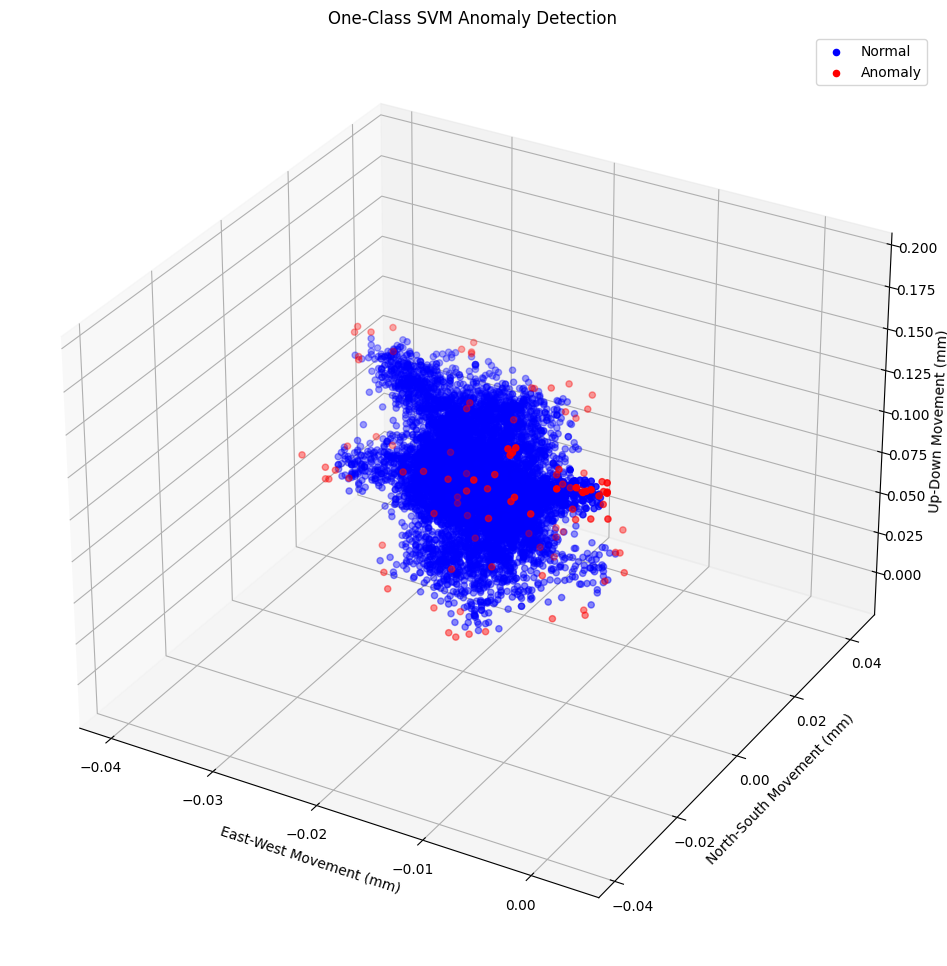

In [5]:
from ndpearthscope import detect_and_visualize_anomalies
nrows = 10000
nu = 0.01
detect_and_visualize_anomalies(file_path,nrows,nu)

## Real-Time Data Streaming and Visualization

This section establishes a connection to the Data Collaboratory Kafka server by creating a Kafka Consumer. It focuses on visualizing geospatial data in real-time, particularly:

- **Three components of displacement** are plotted in real-time.
- **Time Frame**: The visualization covers the last 60 seconds of data.

To control the data flow and visualization, utilize the **Jupyter notebook stop button** to halt the plotting process as needed.

This real-time data streaming and visualization provide valuable insights into the dynamic changes occurring in the monitored geophysical phenomena, facilitating immediate analysis and decision-making.

---


In [3]:
from ndpearthscope import consume_and_plot_kafka_data
consume_and_plot_kafka_data(topic, bootstrap_server)

Stopping consumer...


## 3D Real-time GPS Data Visualization

In this segment, we establish a Kafka Consumer to interface with our streaming data infrastructure. This setup enables:

- **3D Visualization**: Leveraging real-time GPS data to render dynamic three-dimensional plots.
- **Interactivity**: Users can initiate or halt the data visualization process at any time using the **Jupyter notebook stop button**.

This approach allows for an immersive exploration of GPS data, providing an intuitive understanding of spatial dynamics as they unfold in real-time.

---


In [4]:
from ndpearthscope import consume_and_plot_kafka_data_3d
consume_and_plot_kafka_data_3d(topic, bootstrap_server)

Stopping consumer...
